<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Handson/blob/master/MlStudy04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <4장 모델훈련>
# 4-1. 선형회귀

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 예측할 회귀관련 변수(X,y)생성
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.randn(100,1)

In [3]:
# 정규방정식을 이용한 선형회귀
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[4.00778305],
       [2.96495989]])

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.00778305],
       [9.93770283]])

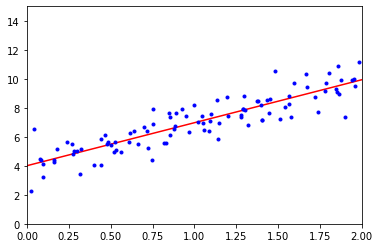

In [6]:
plt.plot(X_new, y_predict, "r-") # X_new의값 0일때 y_predict 3.7 // X_new의값 2일때 y_predict 9.84 두점을 일직선으로 잇는다
plt.plot(X,y,"b.") #X전체 data에대해 y값으로 그린다.(실제값임)
plt.axis([0,2,0,15]) # X축범위 0~2 y축범위 0~15
plt.show()

In [7]:
#이번엔 실제 모델을 임포트해서 써보겠다.(코딩적으로)
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_) #절편, 기울기
lin_reg.predict(X_new)

[4.00778305] [[2.96495989]]


array([[4.00778305],
       [9.93770283]])

In [8]:
# 내부에서 LinearRegression클래스는 이렇게 돌아감(scipy.linalg.lstsq() )사용해서.
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y, rcond=1e-6) 
theta_best_svd # theta^를 계산함.

array([[4.00778305],
       [2.96495989]])

In [9]:
np.linalg.pinv(X_b).dot(y) #유사역행렬을 구하는식(그게 뭔진 모르겠음) 특잇값분해(SVD)를통해 구했다고 한다.

array([[4.00778305],
       [2.96495989]])

# 4-2. 경사하강법 (내용정리)

모델 훈련은 결국 (훈련세트에서) 비용 함수를 최소화하는 모델 파라밑머의 조합을 찾는 일.(파라미터 공간에서)
*그라디언트 = 비용함수의 미분값(이게 0일때 최소점이니, 기울기 가파른 지점으로 가도록 경사하강법 시행)
Idea- 각 파라미터 Oj (theta)에 대해 그라디언트 얼마나 변하는가? 확인
-> 즉, 편도함수를 확인한다. (Oj에 대하여 그라디언트 값 계산. 즉 편미분값)
경사하강법 스텝함수

0n = 0n-1 - n*ㅅMSE(0) // 밑으로 볼록한 함수에 대해.. 손실함수그라디언트(ㅅ)값이 양수면.(즉, 증가해서 최적점에서 멀어지는 값이면) 좌측(감소하는 방향)으로 이동시키려고 -부호가 있는거임. 기울기 음수면 반대로 우측으로 가서 더 밈으로 가게됨. n=학습률.


#4.2.1 배치 경사 하강법
배치 이므로, 훈련Data 전체를 매번 사용해서 학습한다. (So,큰 훈련세트에서 느림)
단, 특성수에 민감하지 않다고 한다.(수십만개 특성? 정규방정식orSVD보다 빠름)
※ Step Size = 학습률

In [10]:
# 경사하강법을 통한 선형회귀
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

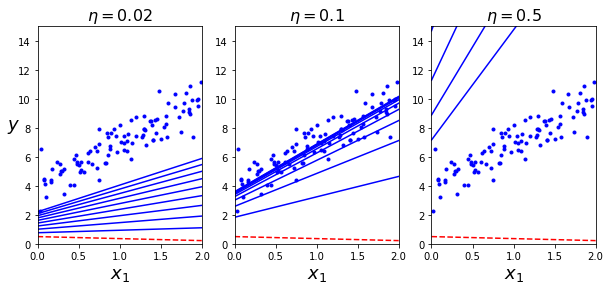

In [16]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

#학습률에 따른 경사하강법 결과 플롯 (넘 낮은경우 -> 넘 큰경우)
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.savefig("gradient_descent_plot")
plt.show()

# 4.2.2 확률적 경사 하강법
- 하나의 샘플을 임의로 추출해서 그라디언트 계산

In [18]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

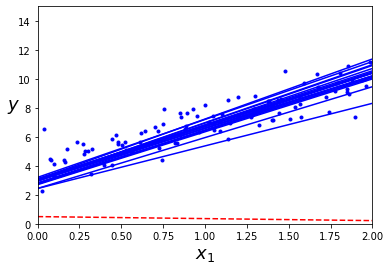

In [19]:
n_epochs = 50 # 50번의 반복만으로 위의 학습률0.1로 1000번 배치학습한 결과와 거의 유사하다.
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터 learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 책에는 빠짐
            y_predict = X_new_b.dot(theta)           # 책에는 빠짐
            style = "b-" if i > 0 else "r--"         # 책에는 빠짐
            plt.plot(X_new, y_predict, style)        # 책에는 빠짐
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # 책에는 빠짐

plt.plot(X, y, "b.")                                 # 책에는 빠짐
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 빠짐
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 빠짐
plt.axis([0, 2, 0, 15])                              # 책에는 빠짐
plt.savefig("sgd_plot")                                 # 책에는 빠짐
plt.show()                                           # 책에는 빠짐

In [20]:
from sklearn.linear_model import SGDRegressor # 
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [21]:
sgd_reg.intercept_, sgd_reg.coef_ #다른 방법(정규방정식)결과값과 비슷. 실제 정답(4,3)과도 유사.

(array([3.95041611]), array([2.93501241]))

# 4.2.3 미니배치 경사 하강법
4.2.1과 4.2.2의 중간단계
한샘플 < 미니배치 < 배치 의 느낌.
학습스케줄을 적당히 설정해준다면 최적값 도달 가능,

In [22]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 무작위 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [23]:
theta

array([[3.94815928],
       [2.89656425]])

In [24]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

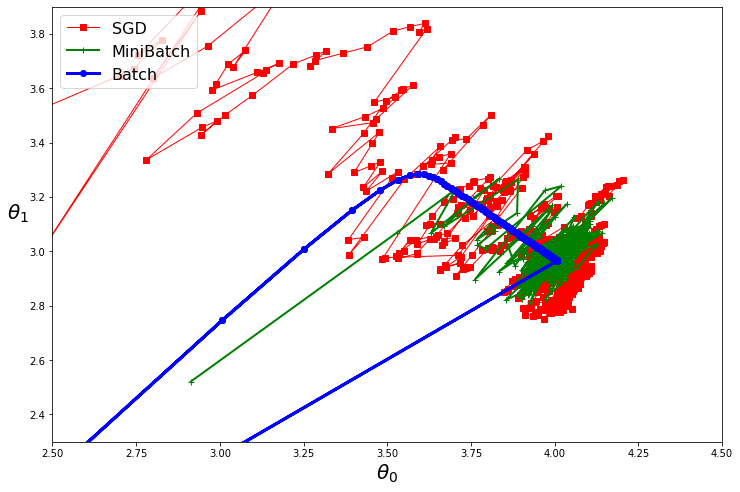

In [30]:
plt.figure(figsize=(12,8))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="SGD")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="MiniBatch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.savefig("gradient_descent_paths_plot")
plt.show()